In [54]:
%load_ext autoreload
%autoreload 2

from ETL import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Small sensors

As an example, let's build modules, readout boards and power boards for small sensors.
A small sensor consists of 16x16 pads, and measures 21.75 x 22mm, with a 0.5mm wide dead area all around the sensor.

2x2 sensors will be placed on one module, with a gap of 0.1mm between them.

This is a baseline, but we can investigate how the efficiency hit efficiency is impacted if the sensor gaps and/or module gaps are changed


In [55]:
sensor_x = 21.75
sensor_y = 22
sensor_gap_x = 1.0
sensor_gap_y = 0.5
module_x = 0.6 + 2*sensor_x + sensor_gap_x
module_y = 56.50

s = Sensor(sensor_x, sensor_y, deadspace=0.5)

m = Module(module_x, module_y,
           n_sensor_x = 2,
           n_sensor_y = 2,
           sensor_distance_y = sensor_y + sensor_gap_y,
           sensor_distance_x=sensor_x+sensor_gap_x
          )

# populate the module with sensors
m.populate(s)

# create some readout and power boards.
# The x dimension will be aligned later on, so we just use a dummy value of 10mm.

rb = ReadoutBoard(10,module_y, color='green')
pb = ReadoutBoard(10,29.5, color='red')


We can look at one module to see if we didn't screw up any dimenstions.

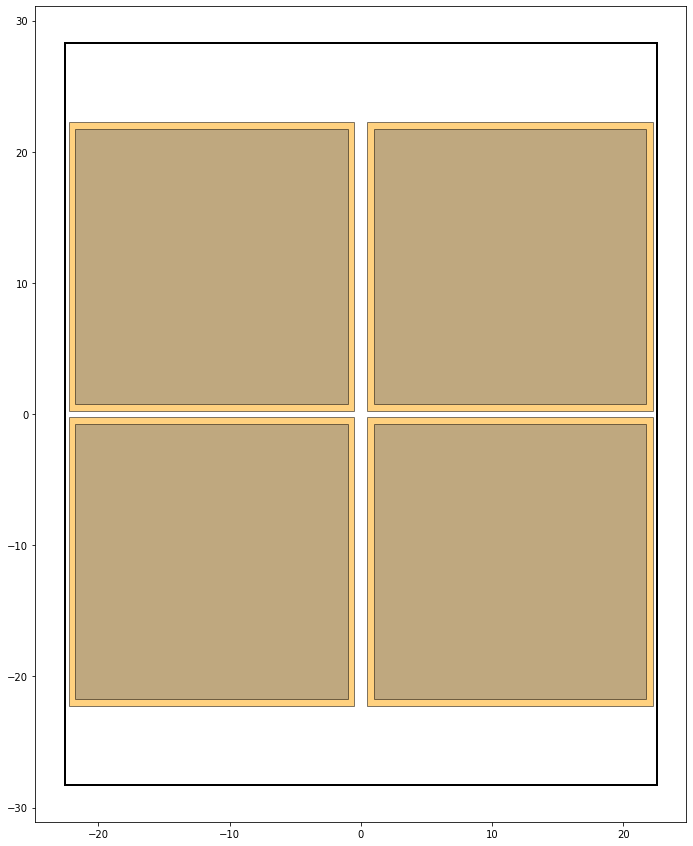

In [56]:
plt.rcParams['figure.figsize'] = [15, 15]

pm = m.getPolygon()
plt.gca().add_patch(pm)

for sen in m.sensors:
    plt.gca().add_patch(sen.getPolygon())
    plt.gca().add_patch(sen.getPolygon(active=True))
    
plt.axis('scaled')
plt.show()

## Populate the disks with sensors and modules

First, we create super modules out of N modules, power and readout boards.
The smallest entity will probably contain 3 modules, so let's use them as starting point.
We assume a gap of 0.5 mm between the modules.
The power board can be either above or below the modules, which is set with the orientation parameter.

Then, we can create a dee with inner/outer radius of 315 and 1185mm.



In [57]:
r_inner = 315
r_outer = 1185

module_gap = 0.5

detector = {}

SM = SuperModule(m, pb, rb, n_modules=3, module_gap=module_gap, orientation='above')

detector['disk1_front'] = Dee(r_inner, r_outer)
detector['disk1_front'].populate(SM, center_RB=True)

SM = SuperModule(m, pb, rb, n_modules=3, module_gap=module_gap, orientation='above')

detector['disk1_back'] = Dee(315, 1185)
detector['disk1_back'].populate(SM, center_PB=True)

SM = SuperModule(m, pb, rb, n_modules=3, module_gap=module_gap, orientation='below')

detector['disk2_front'] = Dee(315, 1185)
detector['disk2_front'].populate(SM, center_RB=True)

SM = SuperModule(m, pb, rb, n_modules=3, module_gap=module_gap, orientation='below')

detector['disk2_back'] = Dee(315, 1185)
detector['disk2_back'].populate(SM, center_PB=True)



## Supermodule

We can then look at one of the previously created super modules.
The last one we created has the power board below the modules, and contains 3 modules.
Let's see if this is actually the case.


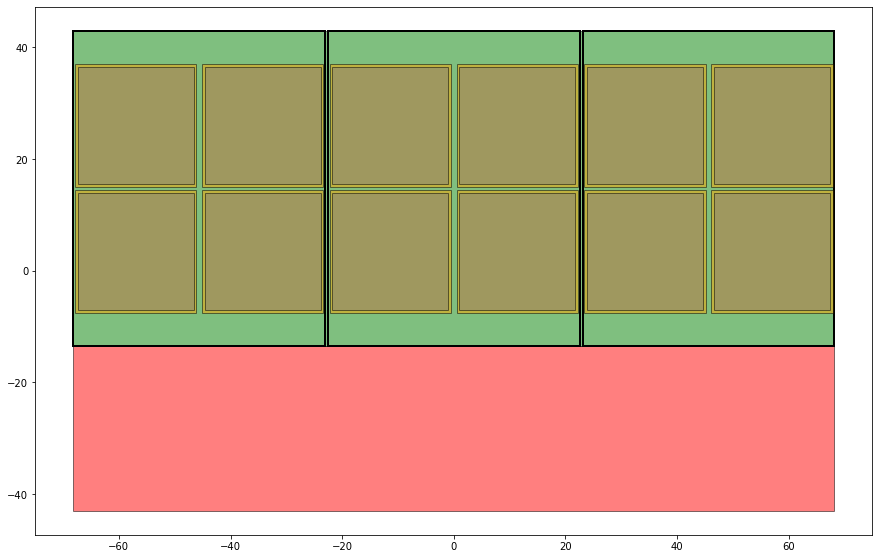

In [58]:
plt.rcParams['figure.figsize'] = [15, 15]

#plt.gca().add_patch(SM.getPolygon())
plt.gca().add_patch(SM.PB.getPolygon())
plt.gca().add_patch(SM.RB.getPolygon())

for mod in SM.modules:
    plt.gca().add_patch(mod.getPolygon())
    for sen in mod.sensors:
        plt.gca().add_patch(sen.getPolygon())
        plt.gca().add_patch(sen.getPolygon(active=True))

plt.axis('scaled')
plt.show()

## Active area of the full detector

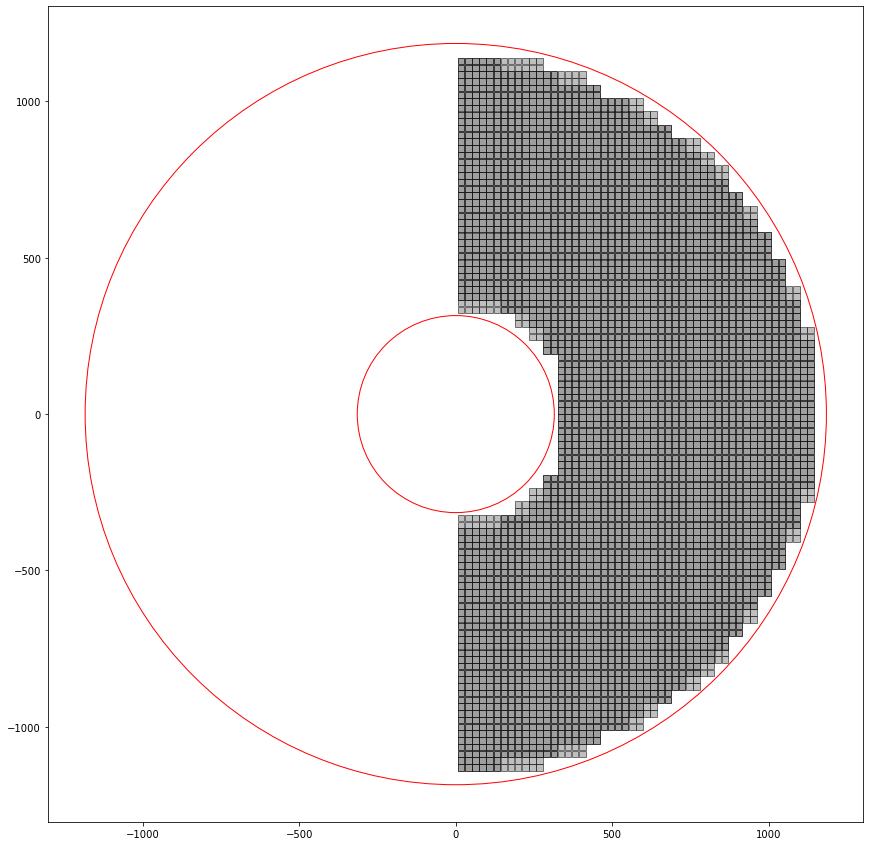

In [59]:
inner = plt.Circle((0, 0), 315,fill=None, edgecolor='r')
outer = plt.Circle((0, 0), 1185,fill=None, edgecolor='r')

plt.rcParams['figure.figsize'] = [15, 15]

plt.gca().add_patch(inner)
plt.gca().add_patch(outer)

for dee in detector:
    for slot in detector[dee].slots_flat:
        if slot.covered:
            #plt.gca().add_patch(slot.getPolygon())
            #plt.gca().add_patch(slot.RB.getPolygon())
            #plt.gca().add_patch(slot.PB.getPolygon())
            for mod in slot.modules:
                for sen in mod.sensors:
                    plt.gca().add_patch(sen.getPolygon(active=True))


#plt.savefig('test.pdf')
        
plt.axis('scaled')
plt.show()

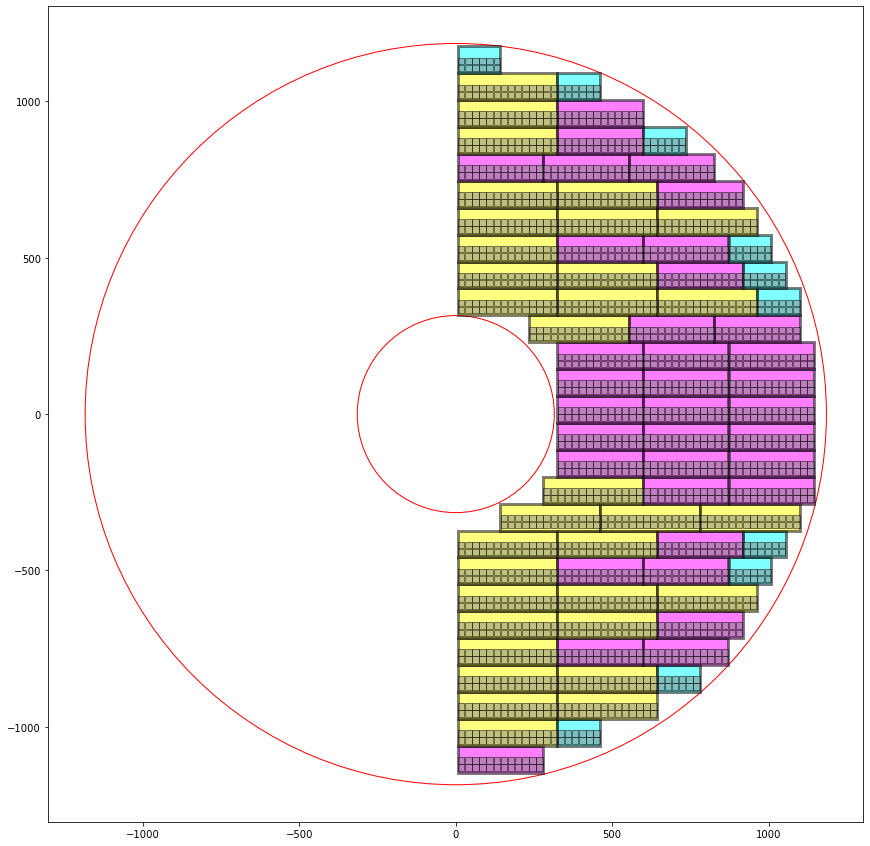

In [60]:

inner = plt.Circle((0, 0), 315,fill=None, edgecolor='r')
outer = plt.Circle((0, 0), 1185,fill=None, edgecolor='r')

plt.rcParams['figure.figsize'] = [15, 15]

plt.gca().add_patch(inner)
plt.gca().add_patch(outer)

for SM in detector['disk1_front'].supermodules:
    plt.gca().add_patch(SM.getPolygon())

for slot in detector['disk1_front'].slots_flat:
    if slot.covered:
        for mod in slot.modules:
            for sen in mod.sensors:
                plt.gca().add_patch(sen.getPolygon(active=True))

#plt.savefig('test.pdf')
        
plt.axis('scaled')
plt.show()

# Throwing random coordinates

In [61]:
def make_ETL(sensor_gap_x):
    sensor_x = 21.75
    sensor_y = 22
    sensor_gap_y = 0.5
    module_x = 0.6 + 2*sensor_x + sensor_gap_x
    module_y = 56.50
    s = Sensor(sensor_x, sensor_y, deadspace=0.5)
    m = Module(module_x, module_y,
           n_sensor_x = 2,
           n_sensor_y = 2,
           sensor_distance_y = sensor_y + sensor_gap_y,
           sensor_distance_x=sensor_x+sensor_gap_x
          )
    m.populate(s)
    rb = ReadoutBoard(10,module_y, color='green')
    pb = ReadoutBoard(10,29.5, color='red')

    detector = {}
    SM = SuperModule(m, pb, rb, n_modules=3, module_gap=module_gap, orientation='above')
    detector['disk1_front'] = Dee(r_inner, r_outer)
    detector['disk1_front'].populate(SM, center_RB=True)
  
    SM = SuperModule(m, pb, rb, n_modules=3, module_gap=module_gap, orientation='above')
    detector['disk1_back'] = Dee(315, 1185)
    detector['disk1_back'].populate(SM, center_PB=True)
  
    SM = SuperModule(m, pb, rb, n_modules=3, module_gap=module_gap, orientation='below')
    detector['disk2_front'] = Dee(315, 1185)
    detector['disk2_front'].populate(SM, center_RB=True)
  
    SM = SuperModule(m, pb, rb, n_modules=3, module_gap=module_gap, orientation='below')
    detector['disk2_back'] = Dee(315, 1185)
    detector['disk2_back'].populate(SM, center_PB=True)

    return detector

In [62]:
z_ref = 2.99825
z = [
    2.99825,
    3.0055,
    3.02075,
    3.0285,
]

In [63]:
eta_max = 2.950
eta_min = 1.659
eta_range = eta_max-eta_min

nEvents = int(1e5)

eta = np.random.rand(nEvents)*eta_range + eta_min
phi = np.random.rand(nEvents)*np.pi - np.pi/2

vec = three_vector.fromEtaPhi(eta, phi, np.ones(nEvents)*3000)

vec_list = []
for x,y in zip(vec.x, vec.y):
    vec_list.append(three_vector(x,y,3000))

hits = {
    '0.1':[],
    '0.3':[],
    '0.5':[],
    '0.7':[],
    '1.0':[]
       }
   
nHits = {
    '0.1':[],
    '0.3':[],
    '0.5':[],
    '0.7':[],
    '1.0':[]
}

detector_variants = {
    '0.1' : make_ETL(0.1), 
    '0.3' : make_ETL(0.3), 
    '0.5' : make_ETL(0.5), 
    '0.7' : make_ETL(0.7), 
    '1.0' : make_ETL(1.0)
        }

for v in vec_list:    
    for det in detector_variants:
        n = 0
        iLayer = 0

        for layer in ['disk1_front', 'disk1_back', 'disk2_front', 'disk2_back']:
            x_shift = 1000*(z[iLayer]-z_ref)*np.tan(v.theta)*np.cos(v.phi)
            y_shift = 1000*(z[iLayer]-z_ref)*np.tan(v.theta)*np.sin(v.phi)
            x,y = ((v.x + x_shift), (v.y + y_shift))
                
            if detector_variants[det][layer].intersect(x, y):
                n += 1
            iLayer += 1
            
        if n>0: hits[det].append(v)
        nHits[det].append(n)


In [64]:
from yahist import Hist1D

from yahist.utils import fit_hist, ignore_division_errors
import scipy

In [65]:
import os
import mplhep as hep

plt.style.use(hep.style.CMS)  # or ATLAS/LHCb

bins = "10,1.9,2.5"

numerators = {var: Hist1D([v.eta for v in hits[var]], bins=bins) for var in detector_variants}
den = Hist1D([v.eta for v in vec_list], bins=bins)
ratios = {var: numerators[var].divide(den, binomial=True) for var in numerators}

ratios['0.1'].plot(
    show_errors=True,
    color="blue",
    label='0.1 mm: %.2f'%( len(hits['0.1']) / len(vec_list) )
)
ratios['0.3'].plot(
    show_errors=True,
    color="green",
    label='0.3 mm: %.2f'%( len(hits['0.3']) / len(vec_list) )
)
ratios['0.5'].plot(
    show_errors=True,
    color="orange",
    label='0.5 mm: %.2f'%( len(hits['0.5'] / len(vec_list) )
)
ratios['0.7'].plot(
    show_errors=True,
    color="red",
    label='0.7 mm: %.2f'%( len(hits['0.7']) / len(vec_list) )
)
ratios['1.0'].plot(
    show_errors=True,
    color="purple",
    label='1.0 mm: %.2f'%( len(hits['1.0']) / len(vec_list) )
)

ax.set_ylim(0.05,1.05)

fig.savefig(os.path.join("{}.pdf".format(name)))
fig.savefig(os.path.join("{}.png".format(name)))


SyntaxError: invalid syntax (<ipython-input-65-ef77a2c0bd00>, line 27)

NameError: name 'os' is not defined

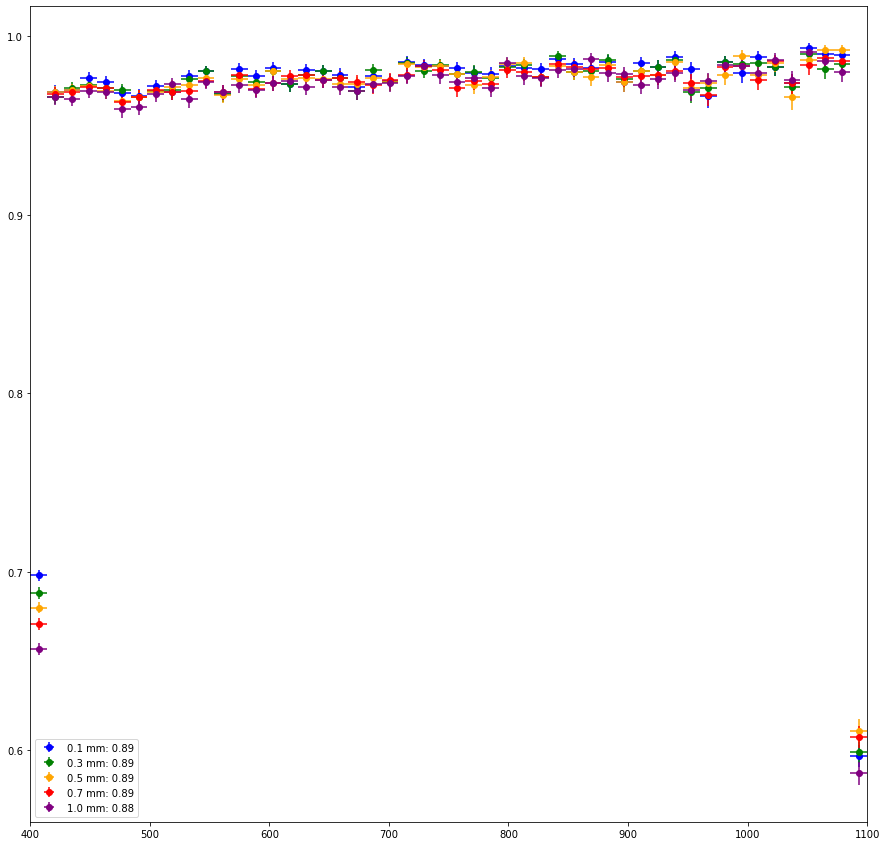

In [66]:
bins = "50,400,1100"

numerators = {var: Hist1D([v.r for v in hits[var]], bins=bins) for var in detector_variants}
den = Hist1D([v.r for v in vec_list], bins=bins)
ratios = {var: numerators[var].divide(den, binomial=True) for var in numerators}


ratios['0.1'].plot(
    show_errors=True,
    color="blue",
    label='0.1 mm: %.2f'%( len(hits['0.1']) / len(vec_list) )
)
ratios['0.3'].plot(
    show_errors=True,
    color="green",
    label='0.3 mm: %.2f'%( len(hits['0.3']) / len(vec_list) )
)
ratios['0.5'].plot(
    show_errors=True,
    color="orange",
    label='0.5 mm: %.2f'%( len(hits['0.5']) / len(vec_list) )
)
ratios['0.7'].plot(
    show_errors=True,
    color="red",
    label='0.7 mm: %.2f'%( len(hits['0.7']) / len(vec_list) )
)
ratios['1.0'].plot(
    show_errors=True,
    color="purple",
    label='1.0 mm: %.2f'%( len(hits['1.0']) / len(vec_list) )
)

ax.set_ylim(0.05,1.05)
ax.set_ylabel('Efficiency')
ax.set_xlabel('r (mm)')

fig.savefig(os.path.join("{}.pdf".format(name)))
fig.savefig(os.path.join("{}.png".format(name)))


In [ ]:
bins = "5,-0.5,4.5"

h = Hist1D(nHits['0.1'], bins=bins)
i = Hist1D(nHits['0.3'], bins=bins)
j = Hist1D(nHits['0.5'], bins=bins)
k = Hist1D(nHits['0.7'], bins=bins)
l = Hist1D(nHits['1.0'], bins=bins)


fig, ax = plt.subplots(1,1,figsize=(7,7))
ax.set_ylim(0.05,1.05)
h.plot(color="blue", histtype="step", linewidth=2, label='small sensor, mean %.2f'%h.mean())
i.plot(color="green", histtype="step", linewidth=2, label='small sensor, mean %.2f'%i.mean())
j.plot(color="orange", histtype="step", linewidth=2, label='small sensor, mean %.2f'%j.mean())
k.plot(color="red", histtype="step", linewidth=2, label='small sensor, mean %.2f'%k.mean())
l.plot(color="purple", histtype="step", linewidth=2, label='small sensor, mean %.2f'%l.mean())

ax.set_ylabel('Tracks')
ax.set_xlabel('Hits')

ax.set_ylim(0,nEvents*1.5)

fig.text(0.0, 0.995, '$\\bf{CMS}$ ETL TAMALES', fontsize=20,  horizontalalignment='left', verticalalignment='bottom', transform=ax.transAxes )

name = 'nHits'
fig.savefig(os.path.join("{}.pdf".format(name)))
fig.savefig(os.path.join("{}.png".format(name)))


In [ ]:
ratios['0.1']

In [ ]:
den

In [ ]:
numerators['0.1']

In [ ]:
h = num.divide(den, binomial=True)
h.plot(show_errors=True, color="red", label='Small sensors: %.2f'%(len(hits['detector_variants'])/len(vec_list)))
fig, ax = plt.subplots(1,1,figsize=(7,7))



ax.set_ylabel('Efficiency')
ax.set_xlabel(r'$\eta$')

ax.set_ylim(0.05,1.05)

fig.text(0.0, 0.995, '$\\bf{CMS}$ ETL TAMALES', fontsize=20,  horizontalalignment='left', verticalalignment='bottom', transform=ax.transAxes )

name = 'efficiency_examples

In [ ]:
sensor_x = 21.75
sensor_y = 22
sensor_gap_x = 0.7
sensor_gap_y = 0.5
module_x = 0.6 + 2*sensor_x + sensor_gap_x
module_y = 56.50
#0.7 MILLIMETER
plt.style.use(hep.style.CMS)  # or ATLAS/LHCb

bins = "40,1.659,2.950"

num = Hist1D([v.eta for v in hits['small_sensor']], bins=bins)
den = Hist1D([v.eta for v in vec_list], bins=bins)

fig, ax = plt.subplots(1,1,figsize=(7,7))

h = num.divide(den, binomial=True)

h.plot(show_errors=True, color="red", label='Small sensors: %.2f'%(len(hits['small_sensor'])/len(vec_list)))

ax.set_ylabel('Efficiency')
ax.set_xlabel(r'$\eta$')

ax.set_ylim(0.85,1.05)

fig.text(0.0, 0.995, '$\\bf{CMS}$ ETL TAMALES', fontsize=20,  horizontalalignment='left', verticalalignment='bottom', transform=ax.transAxes )

name = 'efficiency_examples'

fig.savefig(os.path.join("{}.pdf".format(name)))
fig.savefig(os.path.join("{}.png".format(name)))

In [ ]:
first_case = make_ETL(0.1)
second_case = make_ETL(0.3)